In [171]:
#Largest companies in the United States by revenue

In [173]:
#Import Libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [175]:
#Make request to URL
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')

In [176]:
table = soup.find_all('table')[1]

In [185]:
world_titles = table.find_all('th')

In [187]:
world_titles

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD billions)
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [188]:
world_table_titles = [title.text.strip() for title in world_titles]
print(world_table_titles)

['Rank', 'Name', 'Industry', 'Revenue (USD billions)', 'Employees', 'Headquarters']


In [190]:
df = pd.DataFrame(columns=world_table_titles)
df

,Rank,Name,Industry,Revenue (USD billions),Employees,Headquarters


In [192]:
column_data = table.find_all('tr')

In [195]:
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    
    length = len(df)
    df.loc[length] = individual_row_data

In [197]:
df.head()

,Rank,Name,Industry,Revenue (USD billions),Employees,Headquarters
0,1,Cargill,Food industry,177,"160,000","Minnetonka, Minnesota"
1,2,Koch Industries,Conglomerate,125,"120,000","Wichita, Kansas"
2,3,Publix Super Markets,Retail,54.5,"250,000","Winter Haven, Florida"
3,4,"Mars, Incorporated",Food industry,47,"140,000","McLean, Virginia"
4,5,H-E-B,Retail,43.6,"145,000","San Antonio, Texas"


In [199]:
df.shape

(10, 6)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    10 non-null     object
 1   Name                    10 non-null     object
 2   Industry                10 non-null     object
 3   Revenue (USD billions)  10 non-null     object
 4   Employees               10 non-null     object
 5   Headquarters            10 non-null     object
dtypes: object(6)
memory usage: 560.0+ bytes


In [203]:
df.columns

Index(['Rank', 'Name', 'Industry', 'Revenue (USD billions)', 'Employees',
       'Headquarters'],
      dtype='object')

In [205]:
#Convert to Numeric Data Type

In [207]:
df['Revenue (USD billions)'] = df['Revenue (USD billions)'].str.replace(',', '', regex=True)
df['Employees'] = df['Employees'].str.replace(',', '', regex=True)

In [209]:
df['Revenue (USD billions)'] = pd.to_numeric(df['Revenue (USD billions)'], errors='coerce')
df['Employees'] = pd.to_numeric(df['Employees'], errors='coerce')

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    10 non-null     object 
 1   Name                    10 non-null     object 
 2   Industry                10 non-null     object 
 3   Revenue (USD billions)  10 non-null     float64
 4   Employees               10 non-null     int64  
 5   Headquarters            10 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 560.0+ bytes


In [213]:
df.isnull().sum()

Rank                      0
Name                      0
Industry                  0
Revenue (USD billions)    0
Employees                 0
Headquarters              0
dtype: int64

In [215]:
df.describe()

,Revenue (USD billions),Employees
count,10.000000,10.000000
mean,60.930000,102000.000000
std,49.796141,75190.129376
min,26.000000,15000.000000
25%,34.775000,37000.000000
50%,41.800000,105000.000000
75%,52.625000,143750.000000
max,177.000000,250000.000000


In [217]:
avg_revenue = df['Revenue (USD billions)'].mean()
print(f"The average revenue for the companies is: {avg_revenue:.2f} USD millions")

The average revenue for the companies is: 60.93 USD millions


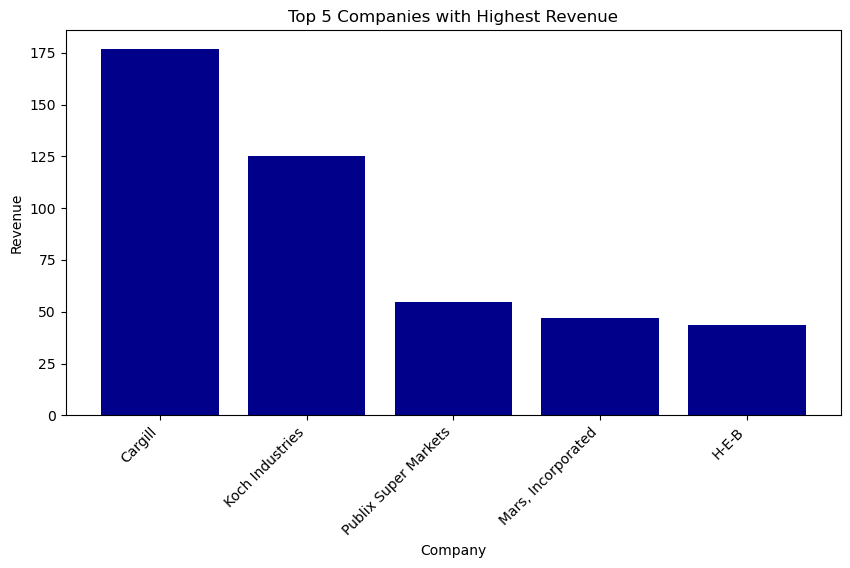

In [219]:
#Sort the dataframe by Revenue (USD millions) in descending order and get first 5 records.
top_companies = df.sort_values(by='Revenue (USD billions)', ascending=False).head(5)

#Create a bar plot for the top 5 companies
plt.figure(figsize=(10,5))
plt.bar(top_companies['Name'], top_companies['Revenue (USD billions)'], color='darkblue')
plt.xlabel('Company')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 5 Companies with Highest Revenue')
plt.show()

In [221]:
df.head()

,Rank,Name,Industry,Revenue (USD billions),Employees,Headquarters
0,1,Cargill,Food industry,177.0,160000,"Minnetonka, Minnesota"
1,2,Koch Industries,Conglomerate,125.0,120000,"Wichita, Kansas"
2,3,Publix Super Markets,Retail,54.5,250000,"Winter Haven, Florida"
3,4,"Mars, Incorporated",Food industry,47.0,140000,"McLean, Virginia"
4,5,H-E-B,Retail,43.6,145000,"San Antonio, Texas"


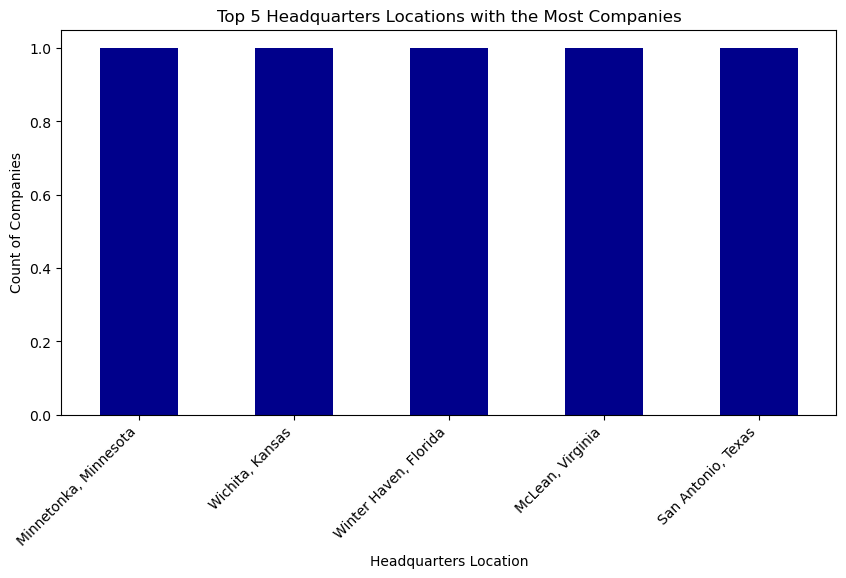

In [223]:
#Find the value counts for headquarters locations
hq_count = df['Headquarters'].value_counts().head(5)

# Create a bar plot for the top headquarters locations
plt.figure(figsize=(10,5))
hq_count.plot(kind='bar', color='darkblue')
plt.xlabel('Headquarters Location')
plt.ylabel('Count of Companies')
plt.xticks(rotation=45, ha='right')
plt.title('Top 5 Headquarters Locations with the Most Companies')
plt.show()

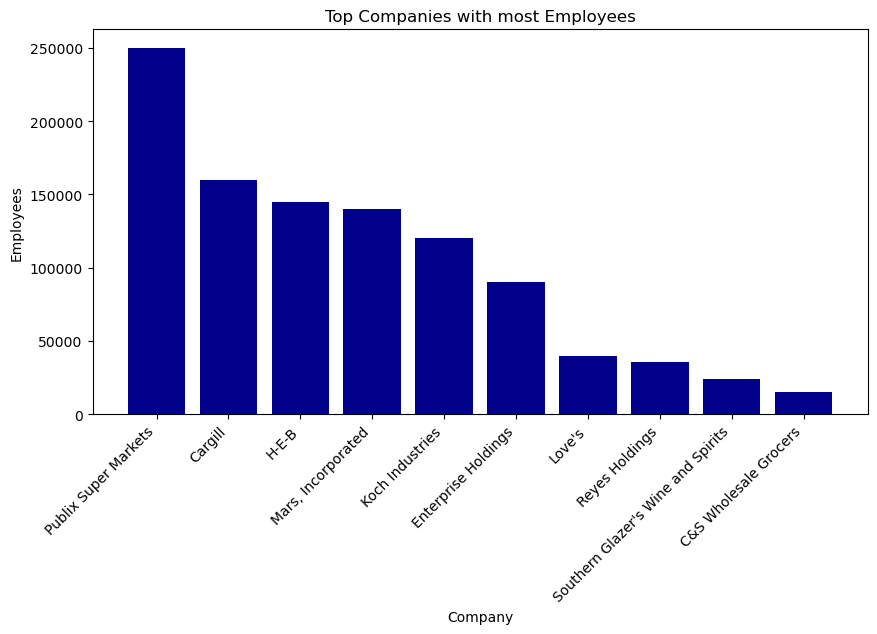

In [225]:
def format_func(value, tick_number):
    return int(value)

companies_most_emp = df.sort_values(by='Employees', ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.bar(companies_most_emp['Name'], companies_most_emp['Employees'], color='darkblue')
plt.xlabel('Company')
plt.ylabel('Employees')
plt.xticks(rotation=45, ha='right')
plt.title('Top Companies with most Employees')

# Apply the formatting function to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))
plt.show()

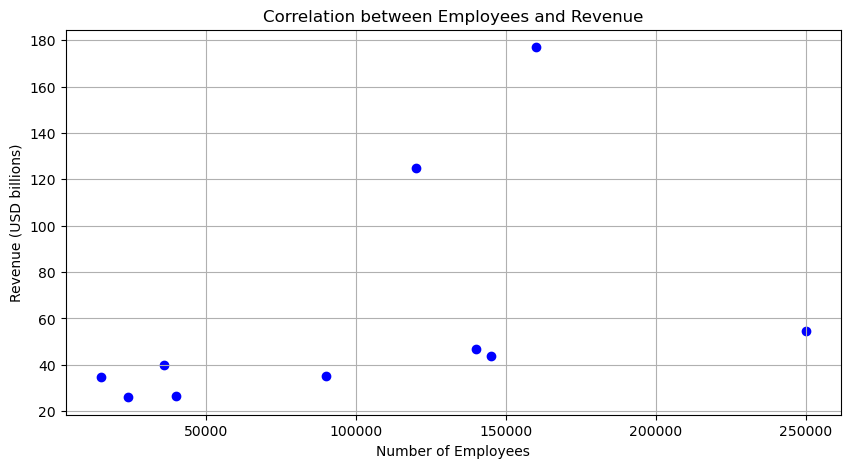

In [227]:
plt.figure(figsize=(10,5))
plt.scatter(df['Employees'], df['Revenue (USD billions)'], c='blue', alpha=1)
plt.xlabel('Number of Employees')
plt.ylabel('Revenue (USD billions)')
plt.title('Correlation between Employees and Revenue')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_func))
plt.show()

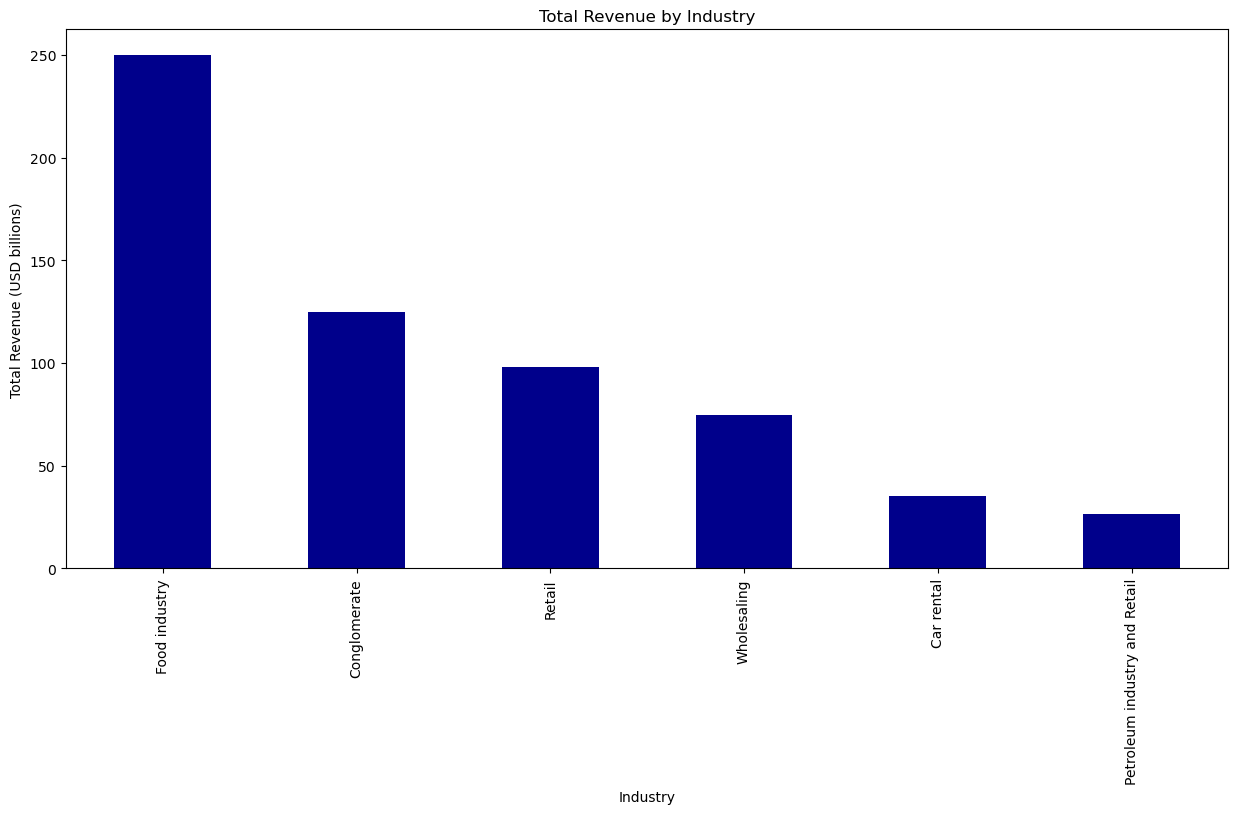

In [229]:
#Group data by industry and calculate total revenue for each industry
industry_df = df.groupby('Industry')['Revenue (USD billions)'].sum().sort_values(ascending=False)

#Create a bar chart to visualize industry revenue
plt.figure(figsize=(15,7))
industry_df.plot(kind='bar', color='darkblue')
plt.xlabel('Industry')
plt.ylabel('Total Revenue (USD billions)')
plt.title('Total Revenue by Industry')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))
plt.show()

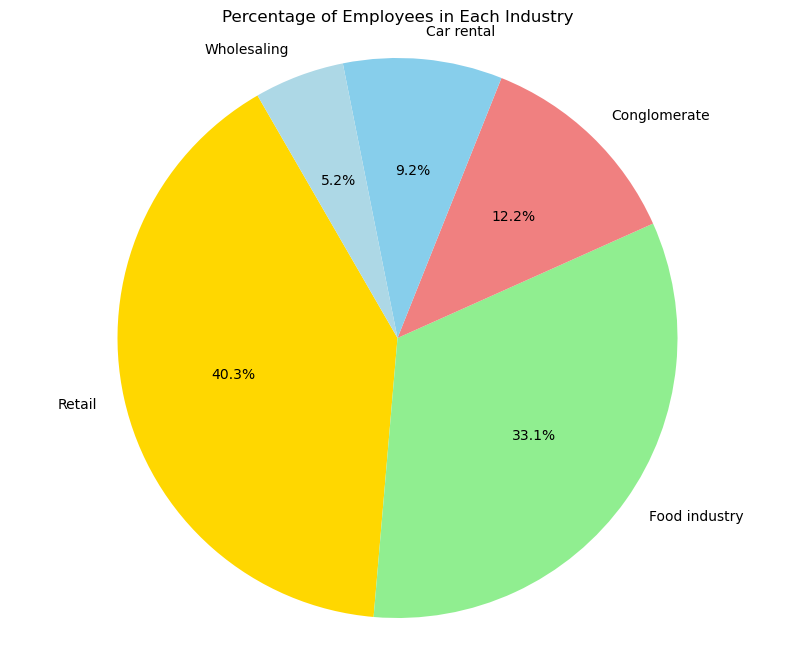

In [231]:
#Group data by industry and calculate the total number of employees in each industry
industry_employees = df.groupby('Industry')['Employees'].sum().sort_values(ascending=False).head(5)

# Create a pie chart to visualize the percentage of employees in top 5 industry
plt.figure(figsize=(10, 8))
plt.pie(industry_employees, 
        labels=industry_employees.index, 
        autopct='%1.1f%%', startangle=120, 
        colors=['gold', 'lightgreen', 'lightcoral', 'skyblue','lightblue']
       )
plt.title('Percentage of Employees in Each Industry')
plt.axis('equal')

plt.show()

In [233]:
df.head()

,Rank,Name,Industry,Revenue (USD billions),Employees,Headquarters
0,1,Cargill,Food industry,177.0,160000,"Minnetonka, Minnesota"
1,2,Koch Industries,Conglomerate,125.0,120000,"Wichita, Kansas"
2,3,Publix Super Markets,Retail,54.5,250000,"Winter Haven, Florida"
3,4,"Mars, Incorporated",Food industry,47.0,140000,"McLean, Virginia"
4,5,H-E-B,Retail,43.6,145000,"San Antonio, Texas"


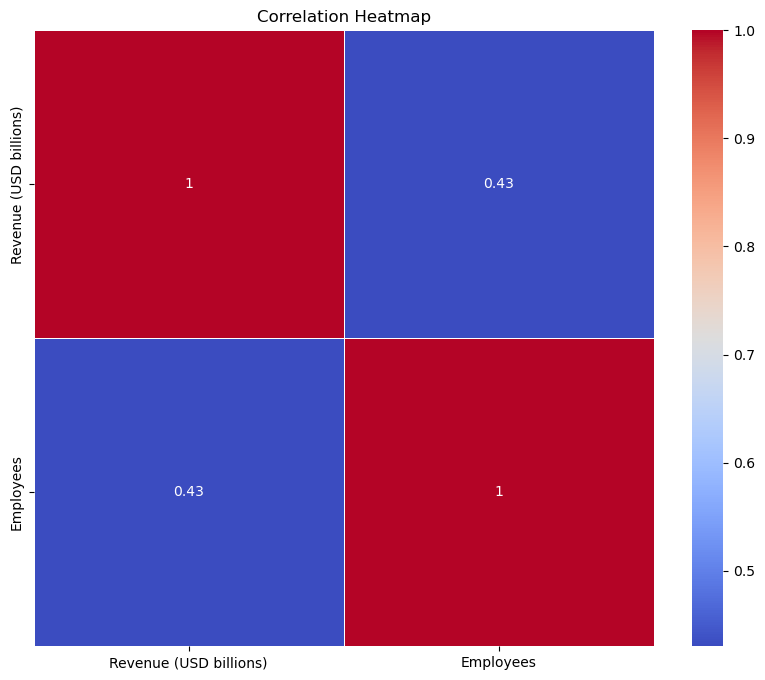

In [235]:
corr_matrix = df[['Revenue (USD billions)', 'Employees']].corr()

#Create a heatmap to visualize the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths='0.5')
plt.title('Correlation Heatmap')
plt.show()